In [19]:
import pandas as pd

analisis_cancer = pd.read_csv("data/analisis_cancer.csv")
analisis_sangre = pd.read_csv("data/analisis_sangre_dataset.csv")
imagenes_paciente = pd.read_csv("data/historial_medico_imagenes.csv")
historial_medico = pd.read_csv("data/historial_medico.csv")
df_merged = pd.read_csv("data/merged.csv")

In [5]:
print(analisis_cancer.columns.to_list())
print(analisis_sangre.columns.to_list())
print(imagenes_paciente.columns.to_list())
print(historial_medico.columns.to_list())

['id', 'cancer_stage', 'tumor_size', 'early_detection', 'inflammatory_bowel_disease', 'relapse']
['id', 'haemoglobin', 'platelet', 'white_corpuscles', 'red_corpuscles', 'glucose', 'cholesterol']
['id', 'image_name']
['id', 'sex', 'age', 'family_cancer', 'smoke', 'alcohol', 'obesity', 'diet', 'screening_history', 'healthcare_access', 'survival_prediction']


In [24]:
print(analisis_cancer.isna().sum())
print(analisis_sangre.isna().sum())
print(imagenes_paciente.isna().sum())
print(historial_medico.isna().sum())

id                            0
cancer_stage                  0
tumor_size                    0
early_detection               0
inflammatory_bowel_disease    0
relapse                       0
dtype: int64
id                  0
haemoglobin         0
platelet            0
white_corpuscles    0
red_corpuscles      0
glucose             0
cholesterol         0
dtype: int64
id            0
image_name    0
dtype: int64
id                     0
sex                    0
age                    0
family_cancer          0
smoke                  0
alcohol                0
obesity                0
diet                   0
screening_history      0
healthcare_access      0
survival_prediction    0
dtype: int64


In [ ]:
df_merged = pd.merge(analisis_cancer, analisis_sangre, on='id', how='inner')
df_merged = pd.merge(df_merged, imagenes_paciente, on='id', how='inner')
df_merged = pd.merge(df_merged, historial_medico, on='id', how='inner')

df_merged.to_csv("data/merged.csv",index=False)

In [20]:
df_merged.head()

,id,cancer_stage,tumor_size,early_detection,inflammatory_bowel_disease,relapse,haemoglobin,platelet,white_corpuscles,red_corpuscles,...,sex,age,family_cancer,smoke,alcohol,obesity,diet,screening_history,healthcare_access,survival_prediction
0,1,3,2.788441,No,No,No,12.3,290000,7400,4.6,...,M,77,No,No,Yes,Overweight,Low,Regular,Moderate,Yes
1,2,1,1.049699,No,Yes,No,13.4,390000,8900,5.7,...,M,59,No,No,No,Overweight,Moderate,Regular,High,Yes
2,3,3,8.339153,No,No,No,14.0,360000,8200,5.6,...,M,83,No,No,No,Obese,High,Regular,Moderate,Yes
3,4,3,7.361716,No,No,No,13.2,340000,7800,5.3,...,M,66,No,Yes,No,Normal,Low,Never,High,Yes
4,5,1,7.561065,No,No,No,13.5,350000,8000,5.1,...,F,79,No,Yes,No,Overweight,Low,Never,High,Yes


In [21]:
df_merged.describe()

,id,cancer_stage,tumor_size,haemoglobin,platelet,white_corpuscles,red_corpuscles,glucose,cholesterol,age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,100.500000,1.955000,4.073151,13.017000,308500.000000,7607.000000,4.899500,88.825000,29.04000,69.450000
std,57.879185,0.810096,2.342697,1.314362,59552.350181,845.770441,0.604381,4.787376,1.79009,11.780979
min,1.000000,1.000000,1.018737,10.200000,180000.000000,5600.000000,3.600000,76.000000,24.00000,41.000000
25%,50.750000,1.000000,2.302284,12.000000,260000.000000,7175.000000,4.400000,86.000000,28.00000,59.750000
50%,100.500000,2.000000,3.564306,13.000000,320000.000000,7600.000000,5.050000,90.000000,29.00000,70.000000
75%,150.250000,3.000000,5.414846,14.200000,360000.000000,8200.000000,5.400000,92.000000,30.00000,79.000000
max,200.000000,3.000000,9.870854,15.200000,400000.000000,9200.000000,5.800000,96.000000,32.00000,89.000000


In [22]:
df_merged.dtypes

id                              int64
cancer_stage                    int64
tumor_size                    float64
early_detection                object
inflammatory_bowel_disease     object
relapse                        object
haemoglobin                   float64
platelet                        int64
white_corpuscles                int64
red_corpuscles                float64
glucose                         int64
cholesterol                     int64
image_name                     object
sex                            object
age                             int64
family_cancer                  object
smoke                          object
alcohol                        object
obesity                        object
diet                           object
screening_history              object
healthcare_access              object
survival_prediction            object
dtype: object

In [27]:
df_merged_dummies = pd.get_dummies(df_merged, columns=['cancer_stage', 'obesity', 'diet', 'screening_history', 'healthcare_access'], drop_first=True, dtype=int)

# Reemplazamos 'Yes' y 'No' por 1 y 0 en todo el DataFrame
df_merged_dummies = df_merged_dummies.replace({'Yes': 1, 'No': 0})
df_merged_dummies = df_merged_dummies.replace({'M': 1, 'F': 0})
df_merged_dummies = df_merged_dummies.replace({'True': 1, 'False': 0})

df_merged_dummies.head()

df_merged_dummies.to_csv("data/merged_dummies.csv",index=False)

C:\Users\joant\AppData\Local\Temp\ipykernel_13708\34904671.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged_dummies = df_merged_dummies.replace({'Yes': 1, 'No': 0})
C:\Users\joant\AppData\Local\Temp\ipykernel_13708\34904671.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged_dummies = df_merged_dummies.replace({'M': 1, 'F': 0})


## VISUALIZAR LA MATRIZ DE CORRELACIÓN

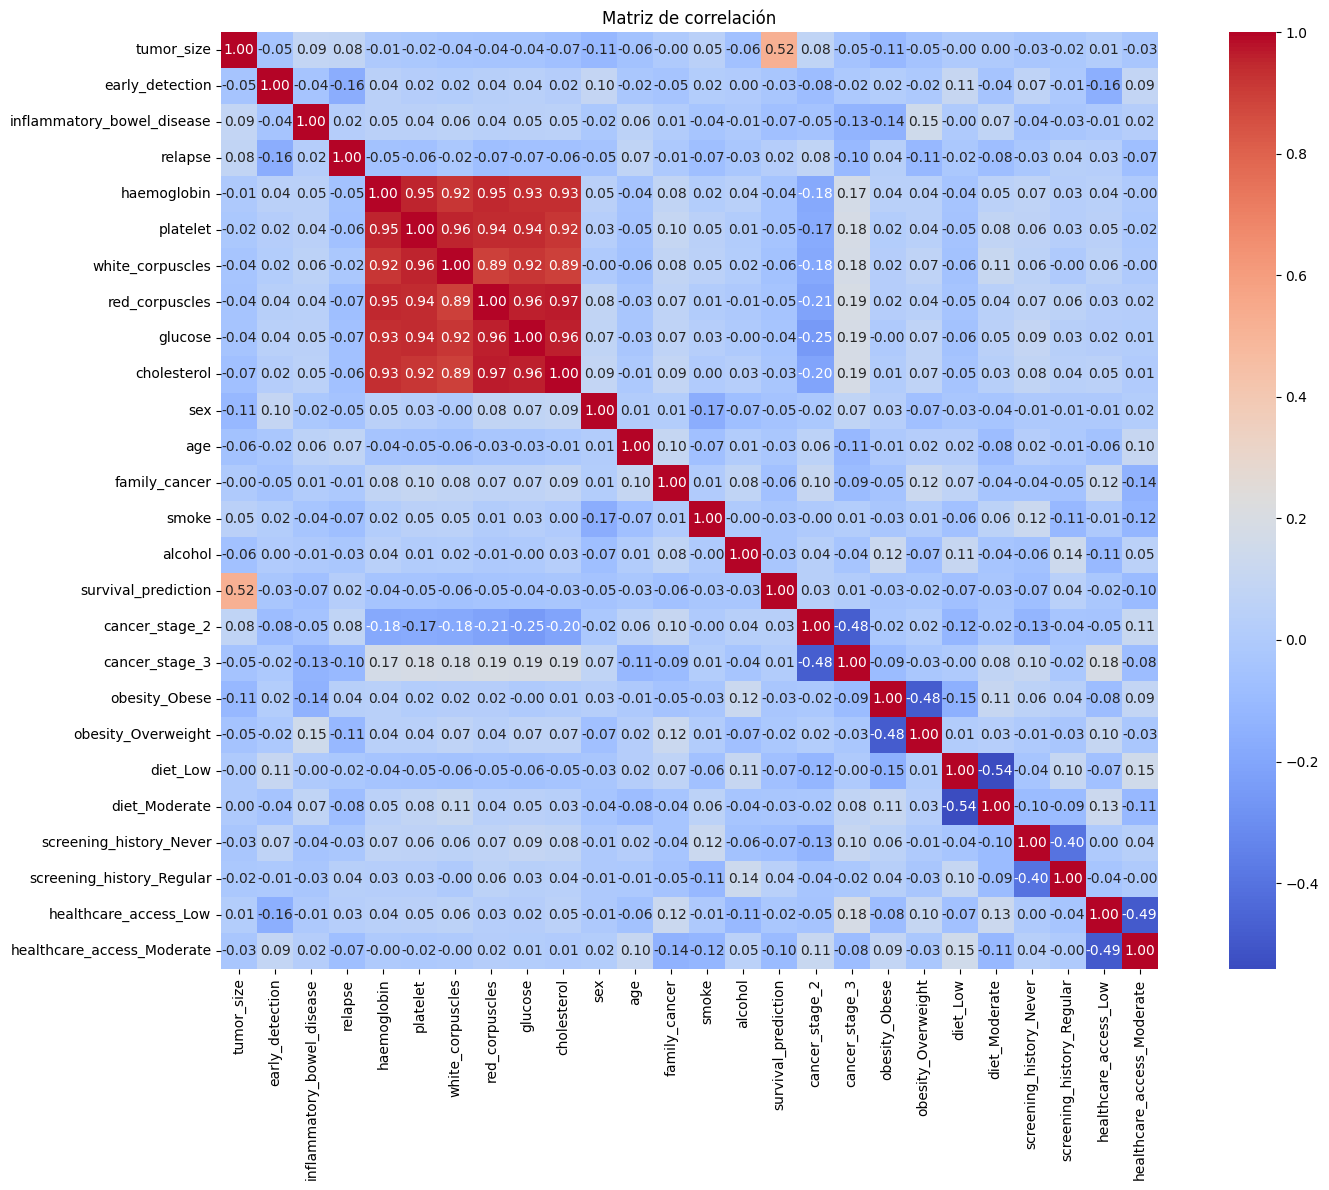

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df_merged_sin_id = df_merged_dummies.drop(columns=['id'])

# Calculamos la matriz de correlación
correlation_matrix = df_merged_sin_id.corr(numeric_only=True)

# Creamos la visualización
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()
